standardization

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
print(df.columns)


Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [5]:
df.sample(5)


,Age,EstimatedSalary,Purchased
215,60,108000,1
282,37,70000,1
395,46,41000,1
212,59,42000,0
358,40,71000,1


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [16]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [14]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [17]:
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


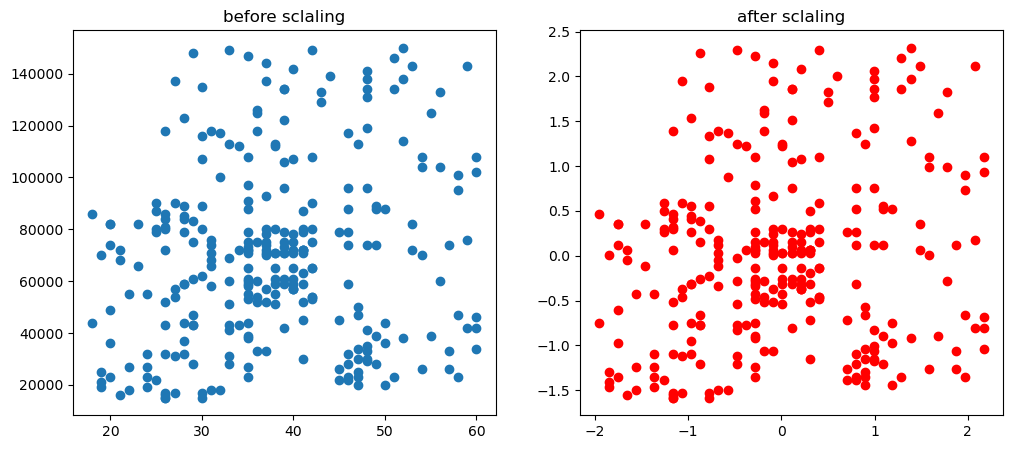

In [22]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title("before sclaling")
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("after sclaling")
plt.show()

normalization

In [5]:
df2 = pd.read_csv('wine.csv')

In [7]:
df2.head()

,fixed_acidity;volatile_acidity;citric_acid;residual_sugar;chlorides;free_sulfur_dioxide;total_sulfur_dioxide;density;pH;sulphates;alcohol;quality
0,7.5;0.33;0.32;11.1;0.036;25;119;0.9962;3.15;0....
1,6.3;0.27;0.29;12.2;0.044;59;196;0.99782;3.14;0...
2,7;0.3;0.51;13.6;0.05;40;168;0.9976;3.07;0.52;9...
3,7.4;0.38;0.27;7.5;0.041;24;160;0.99535;3.17;0....
4,8.1;0.12;0.38;0.9;0.034;36;86;0.99026;2.8;0.55...


In [9]:
pd.DataFrame(df2)

,fixed_acidity;volatile_acidity;citric_acid;residual_sugar;chlorides;free_sulfur_dioxide;total_sulfur_dioxide;density;pH;sulphates;alcohol;quality
0,7.5;0.33;0.32;11.1;0.036;25;119;0.9962;3.15;0....
1,6.3;0.27;0.29;12.2;0.044;59;196;0.99782;3.14;0...
2,7;0.3;0.51;13.6;0.05;40;168;0.9976;3.07;0.52;9...
3,7.4;0.38;0.27;7.5;0.041;24;160;0.99535;3.17;0....
4,8.1;0.12;0.38;0.9;0.034;36;86;0.99026;2.8;0.55...
...,...
2032,8.1;0.34;0.28;7.5;0.04;70;230;0.99558;3.14;0.5...
2033,7.4;0.19;0.31;14.5;0.045;39;193;0.9986;3.1;0.5...
2034,6.7;0.36;0.26;7.9;0.034;39;123;0.99119;2.99;0....
2035,7.7;0.28;0.35;15.3;0.056;31;117;0.9998;3.27;0....


In [18]:
df2 = pd.read_csv('wine.csv', sep=';', usecols=[0, 10, 11])
df2.columns = ['fixed_acidity', 'alcohol', 'quality']


In [20]:
df2

,fixed_acidity,alcohol,quality
0,7.5,10.5,6
1,6.3,8.8,6
2,7.0,9.6,7
3,7.4,10,5
4,8.1,12,6
...,...,...,...
2032,8.1,9.8,6
2033,7.4,9.2,6
2034,6.7,12.2,7
2035,7.7,9.6,5


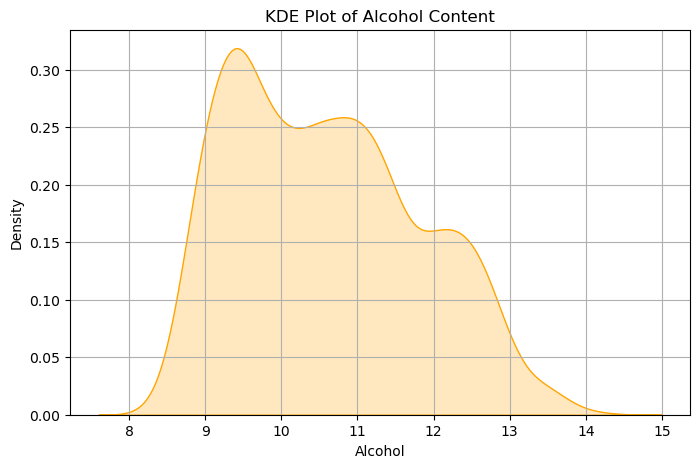

In [27]:
df2.columns = ['fixed_acidity', 'alcohol', 'quality']

# Convert to numeric (important!)
df2['alcohol'] = pd.to_numeric(df2['alcohol'], errors='coerce')

# Drop NaN values if any
df2 = df2.dropna()

# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df2['fixed_acidity'], fill=True, color='orange')
plt.title('KDE Plot of Alcohol Content')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.grid(True)
plt.show()

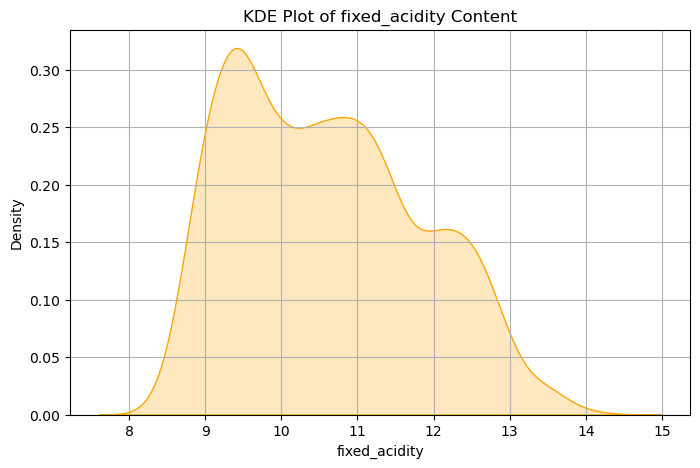

In [28]:
df2.columns = ['fixed_acidity', 'alcohol', 'quality']

# Convert to numeric (important!)
df2['fixed_acidity'] = pd.to_numeric(df2['fixed_acidity'], errors='coerce')

# Drop NaN values if any
df2 = df2.dropna()

# KDE plot
plt.figure(figsize=(8, 5))
sns.kdeplot(df2['fixed_acidity'], fill=True, color='orange')
plt.title('KDE Plot of fixed_acidity Content')
plt.xlabel('fixed_acidity')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<Axes: xlabel='alcohol', ylabel='fixed_acidity'>

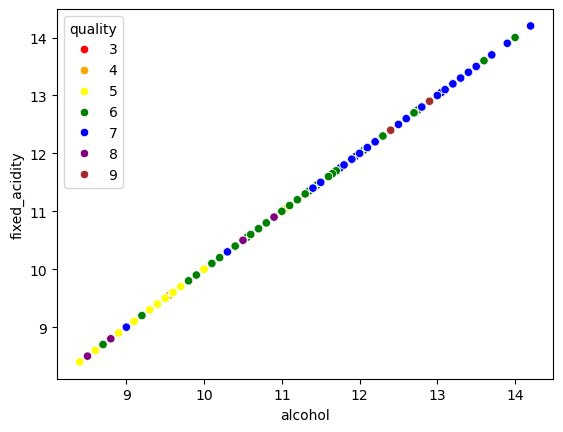

In [33]:
color_dict = {
    3: 'red',
    4: 'orange',
    5: 'yellow',
    6: 'green',
    7: 'blue',
    8: 'purple',
    9: 'brown'
}

sns.scatterplot(x=df2['alcohol'], y=df2['fixed_acidity'], hue=df2['quality'], palette=color_dict)


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df2.drop('quality',axis=1),df2['quality'],test_size=0.3,random_state=0)
x_train.shape, x_test.shape

((1414, 2), (606, 2))

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [43]:
# scaler.mean_

AttributeError: 'MinMaxScaler' object has no attribute 'mean_'

In [49]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [50]:
np.round(x_train.describe(),1)

,fixed_acidity,alcohol
count,1414.0,1414.0
mean,10.6,10.6
std,1.2,1.2
min,8.4,8.4
25%,9.5,9.5
50%,10.5,10.5
75%,11.4,11.4
max,14.2,14.2


In [51]:
print(x_train_scaled.min())
print(x_train_scaled.max())


fixed_acidity    0.0
alcohol          0.0
dtype: float64
fixed_acidity    1.0
alcohol          1.0
dtype: float64


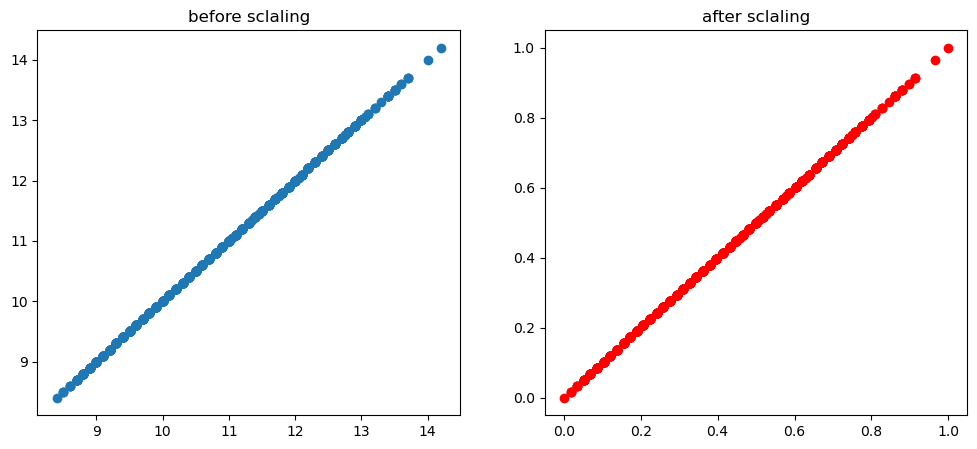

In [52]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['alcohol'],x_train['fixed_acidity'])
ax1.set_title("before sclaling")
ax2.scatter(x_train_scaled['alcohol'],x_train_scaled['fixed_acidity'],color='red')
ax2.set_title("after sclaling")
plt.show()